#### Pricing Model

The entire idea of this study is around the relationship with amenities and price. Building a regression model to predict the price can give us some insights about the amenities that contribute positively for the asking.

So, this notebook explores the possibility of builing a pricing model to predict the prices for Airbnb units in Boston.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,plot_roc_curve
import seaborn as sns
import math
import re
import operator
from ast import literal_eval
from scipy import stats
import common as c

%matplotlib inline

plt.rcParams["figure.figsize"] = (20,3)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Load Data 
listings_df = pd.read_csv('./data/boston/listings.csv')

## Data Understanding

In [3]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20200831170748,2020-09-01,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,69%,33%,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.02991,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,0.0,"[""Oven"", ""Kitchen"", ""Heating"", ""Hangers"", ""Was...",$146.00,28,1125,28.0,28.0,1125.0,1125.0,28.0,1125.0,NaN,t,0,0,0,0,2020-09-01,16,1,0,2015-07-10,2019-12-21,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.26
1,5506,https://www.airbnb.com/rooms/5506,20200831170748,2020-08-31,**$49 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...","Peacful, Architecturally interesting, historic...",https://a0.muscache.com/pictures/1598e8b6-5a55...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,100%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,2,2,"['email', 'phone', 'reviews', 'kba']",t,t,"Boston, Massachusetts, United States",Roxbury,NaN,42.32981,-71.09559,Entire guest suite,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Heating"", ""Hangers"", ""Washer"", ""Carbon monox...",$145.00,3,730,3.0,3.0,730.0,730.0,3.0,730.0,NaN,t,0,0,0,0,2020-08-31,107,7,0,2009-03-21,2020-05-01,95.0,10.0,10.0,10.0,10.0,9.0,10.0,Exempt: This listing is a unit that has contra...,f,6,6,0,0,0.77
2,6695,https://www.airbnb.com/rooms/6695,20200831170748,2020-08-31,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,100%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,2,2,"['email', 'phone', 'reviews', 'kba']",t,t,"Boston, Massachusetts, United States",Roxbury,NaN,42.32994,-71.09351,Entire condominium,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Oven"", ""Kitchen"", ""Heating"", ""Hangers"", ""Was...",$169.00,3,730,3.0,3.0,730.0,730.0,3.0,730.0,NaN,t,0,0,0,0,202

In [4]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.339000e+03,3.339000e+03,3.339000e+03,3339.000000,3339.000000,0.0,3339.000000,3339.000000,3339.000000,0.0,2930.000000,3325.000000,3339.000000,3339.000000,3338.000000,3338.000000,3.338000e+03,3.338000e+03,3338.000000,3.338000e+03,0.0,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,2449.000000,2447.000000,2448.000000,2446.000000,2449.000000,2447.000000,2447.000000,3339.000000,3339.000000,3339.000000,3339.000000,2467.000000
mean,2.695210e+07,2.020083e+13,1.059110e+08,183.682540,183.682540,NaN,42.337520,-71.082978,3.168913,NaN,1.444710,1.700451,35.754118,806.114705,36.190234,57.607849,1.287577e+06,1.287582e+06,55.641282,1.287581e+06,NaN,12.268344,28.157233,45.708595,184.506739,37.990716,8.185984,0.465109,93.681094,9.616265,9.498366,9.757972,9.712127,9.597058,9.292195,28.746032,25.385445,3.300689,0.002995,1.535371
std,1.385068e+07,1.863560e+00,1.151363e+08,432.981256,432.981256,NaN,0.026784,0.033022,2.084834,NaN,0.832824,1.319306,45.472439,474.076139,52.761108,120.886241,5.255771e+07,5.255771e+07,117.537051,5.255771e+07,NaN,12.726269,25.314383,37.866260,140.794234,66.013073,14.079479,1.499020,8.467207,0.834819,0.911264,0.751473,0.769106,0.772773,0.950552,50.925446,50.721071,6.838812,0.054652,1.698305
min,3.781000e+03,2.020083e+13,4.804000e+03,0.000000,0.000000,NaN,42.235760,-71.173940,1.000000,NaN,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000e+00,2.000000e+00,1.000000,2.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.534173e+07,2.020083e+13,1.558399e+07,2.000000,2.000000,NaN,42.321800,-71.103405,2.000000,NaN,1.000000,1.000000,2.000000,365.000000,2.000000,2.000000,5.000000e+02,5.000000e+02,2.000000,5.000000e+02,NaN,0.000000,0.000000,0.000000,30.500000,0.000000,0.000000,0.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.300000
50%,2.824182e+07,2.020083e+13,4.485195e+07,6.000000,6.000000,NaN,42.345020,-71.073380,2.000000,NaN,1.000000,1.000000,21.000000,1125.000000,12.500000,28.000000,1.125000e+03,1.125000e+03,28.000000,1.125000e+03,NaN,7.000000,29.000000,57.000000,179.000000,9.000000,1.000000,0.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,5.000000,2.000000,0.000000,0.000000,1.000000
75%,4.028537e+07,2.020083e+13,1.971076e+08,47.000000,47.000000,NaN,42.354665,-71.060870,4.000000,NaN,2.000000,2.000000,91.000000,1125.000000,91.000000,91.000000,1.125000e+03,1.125000e+03,91.000000,1.125000e+03,NaN,26.000000,55.000000,85.000000,336.000000,44.000000,11.000000,0.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,33.000000,22.000000,3.000000,0.000000,2.240000
max,4.520870e+07,2.020083e+13,3.651163e+08,1636.000000,1636.000000,NaN,42.393760,-70.995950,16.000000,NaN,13.000000,22.000000,1000.000000,9999.000000,1000.000000,1000.000000,2.147484e+09,2.147484e+09,1000.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,557.000000,113.000000,41.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,203.0

In [5]:
# Find numeric columns with NaN.
numeric_columns_with_nan = c.find_numeric_columns_with_nans(listings_df)
numeric_columns_with_nan

['neighbourhood_group_cleansed',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126884850>,
      dtype=object)

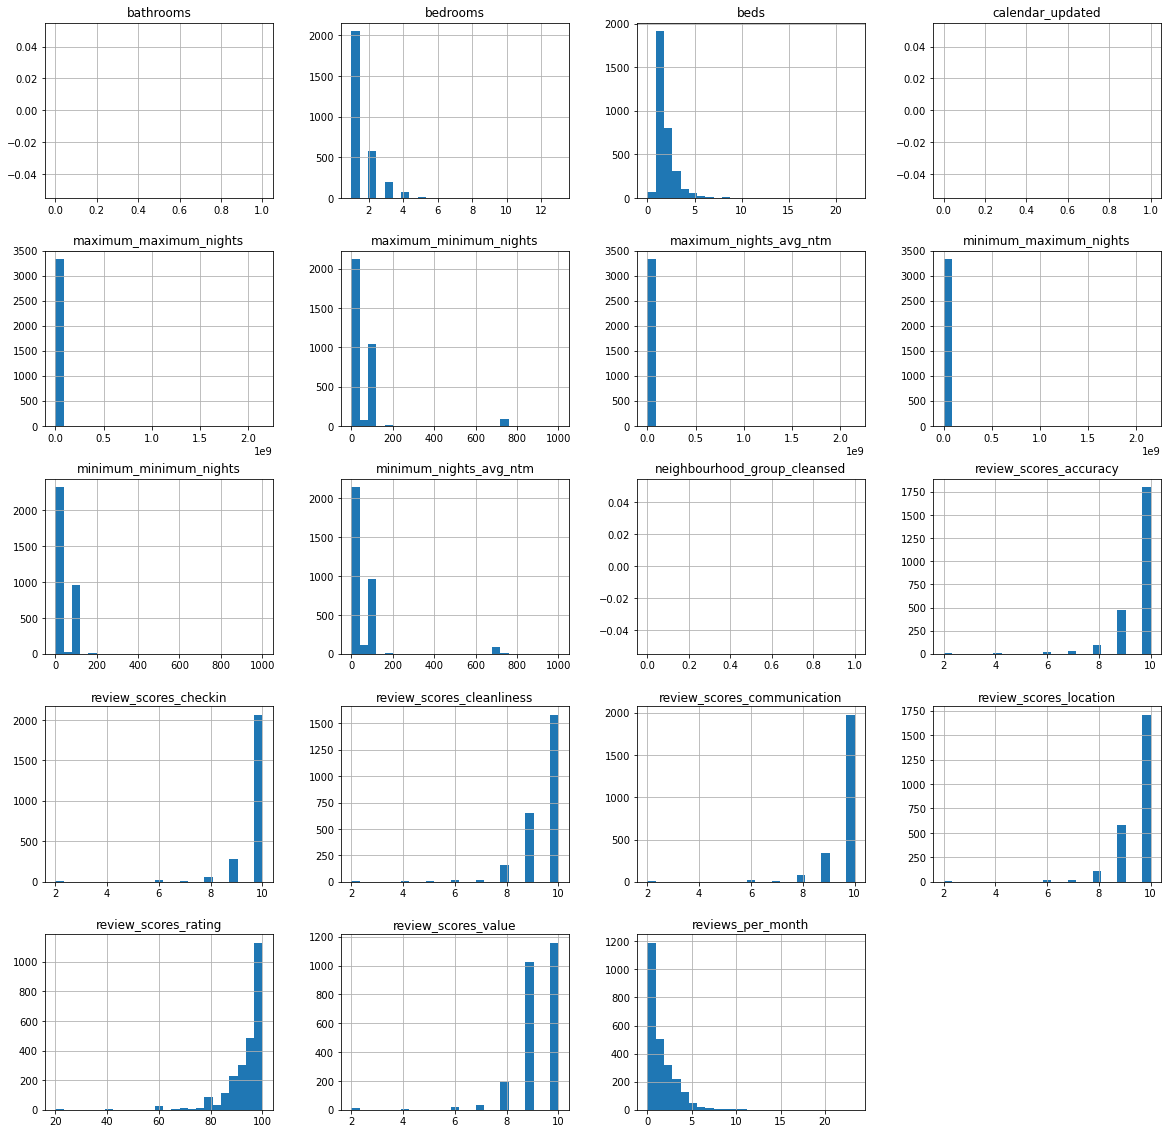

In [6]:
listings_df[numeric_columns_with_nan].hist(figsize=(20, 20), bins=25)

#### Notes about the data types and formats:

- **Amenities:** are in a raw array of string with potential encoding issues too. They neeed to be cleanedup. In order to feed the amenities properly to the model we need to create a column per amenity and with a flag (1- present, 0- not present)
- **Price:** We need to clean it up and we need to convert it to a float.
- **Boolean Columns:** Lets convert these in 1 or 0.
- **Dates:** In this model we are not using the dates since, for now we don't see relevance on using them.
- **IDs&URLs :** Columns that are unique IDs and URLs will be excluded from the model since they don't add nothing to the model.
- **Bathrooms:** Is empty, instead of impute this value, we can instead work with the column bathroom_text that is more complete and extract more column that can be useful like: Shared Bathroom, Half, etc...
- **Beds&Bedrooms:** We impute the value using the mean since they are 1.7 and 1.4 which is reasonable for a listing to have 1 bedroom and 2 beds on average.
- **Numeric Reviews:** We are imputing missing values values with the mean.
- **Nights Limits:** We won't use these columns since they mostly don't show any useful distribution.
- **neighbourhood_group_cleansed:** It is a categorical feature we are imputing missing values with the most frequent (mode)
- **host_response_rate&host_acceptance_rate:** Clean up the values to remove the % char and convert it to float. Then impute values with the mean.



## Data Preparation

In [7]:
def convert_baths_text_to_numbers(baths_text):
    """
    Converts the bathrooms to number.
    """
    baths_str = str(baths_text).lower()
    if baths_str == "half-bath" or baths_str == "private half-bath" or baths_str == "shared half-bath":
        return 0.5
    else:
        return float(re.match("([\d\.]+)([ \-a-bA-Z]*)", baths_text).group(1))
    
def explode_list_to_col(df, id_col, col_to_explode, prefix=""):
    """
    Explodes a column of the type List into columns with a flag (0 or 1) of observed or not.
    """
    _df = df[[id_col, col_to_explode]].copy()
    _df[col_to_explode] = _df[col_to_explode].apply(literal_eval) #convert to list type
    _df = _df.explode(col_to_explode)
    _df["observed"] = 1
    _df[col_to_explode] = _df[col_to_explode].apply(lambda x: str(prefix) + str(x))
    _df = pd.pivot_table(_df, index=id_col, columns=[col_to_explode], values="observed", aggfunc=np.max, fill_value=0)
    merged_df = pd.merge(df, _df, on=id_col)
    return merged_df

def cleanup_and_normalize_dataset(original_df):
    """
    Applies the necessary operations to clean up the AirBnB listings dataset.
    """
    df = original_df.copy()
    # Remove percentage chars from rates.
    df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)
    df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)
    # Since it is a rate lets impute the values with the mean.
    df = c.fill_nans_with_mean(df, ['host_response_rate', 'host_acceptance_rate'])
    
    # Convert booleans with 0s and 1s
    df['host_is_superhost'] = df['host_is_superhost'].str.replace('f','0').str.replace('t','1').astype(int)
    df['host_has_profile_pic'] = df['host_has_profile_pic'].str.replace('f','0').str.replace('t','1').astype(int)
    df['host_identity_verified'] = df['host_identity_verified'].str.replace('f','0').str.replace('t','1').astype(int)
    df['instant_bookable'] = df['instant_bookable'].str.replace('f','0').str.replace('t','1').astype(int)
    
    #Extract info from bathrooms text 
    df['num_bathrooms'] = df['bathrooms_text'].fillna('0 baths').apply(lambda b_str: convert_baths_text_to_numbers(b_str))
    df['shared_bathrooms'] = df['bathrooms_text'].fillna('0 baths').apply(lambda b_str: 1 if "shared" in b_str.lower() else 0)
    df['half_bathrooms'] = df['bathrooms_text'].fillna('0 baths').apply(lambda b_str: 1 if "half" in b_str.lower() else 0)
    df = df.drop(columns =['bathrooms_text'])
    
    # Beds & Bedrooms fillup NaNs with mean
    df = c.fill_nans_with_mean(df, ['beds', 'bedrooms'])
    
    # Fill Reviews with NaNs with mean
    df = c.fill_nans_with_mean(df, ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month'])
    
    # Fill Night limits and avgs with NaNs with mode
    df = c.fill_nans_with_mean(df, ['neighbourhood_group_cleansed'])
    
    # Convert License into a boolean
    df['license'] = df['license'].fillna('0').apply(lambda lic: 0 if lic != '0' else 1).astype(int)
    
    # Remove special chars from price and convert it into a float
    df['price'] = c.clean_price(df)
    
    # Consider only listings with price greatter than 0
    df = df[df.price > .0]
    
    #Categorical features
    df['room_type'] = df['room_type'].astype('category').cat.codes
    df['property_type'] = df['property_type'].astype('category').cat.codes
    df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype('category').cat.codes
    df['neighbourhood_group_cleansed'] = df['neighbourhood_group_cleansed'].astype('category').cat.codes
    
    return df

def explode_lists(df):
    """
    Explodes ameneties and host_verifications
    """
    df['amenities'] = df['amenities'].apply(literal_eval) #convert to list type
    df['amenities'] = df['amenities'].apply(lambda data: str(data)) 
    df = explode_list_to_col(df, 'id', 'amenities', 'amenity_')
    
    df['host_verifications'] = df['host_verifications'].apply(literal_eval) #convert to list type
    df['host_verifications'] = df['host_verifications'].apply(lambda data: str(data))
    df = explode_list_to_col(df, 'id', 'host_verifications', 'host_verifications_')
    
    #Drop unnecessary columns
    df = df.drop(columns=['amenities', 'host_verifications'])
    return df

In [8]:
cleaned_df = cleanup_and_normalize_dataset(listings_df.copy())

In [9]:
# The columns that we are interrested in have the missing values imputed
c.find_numeric_columns_with_nans(cleaned_df)

['bathrooms', 'calendar_updated']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126ca3850>,
      dtype=object)

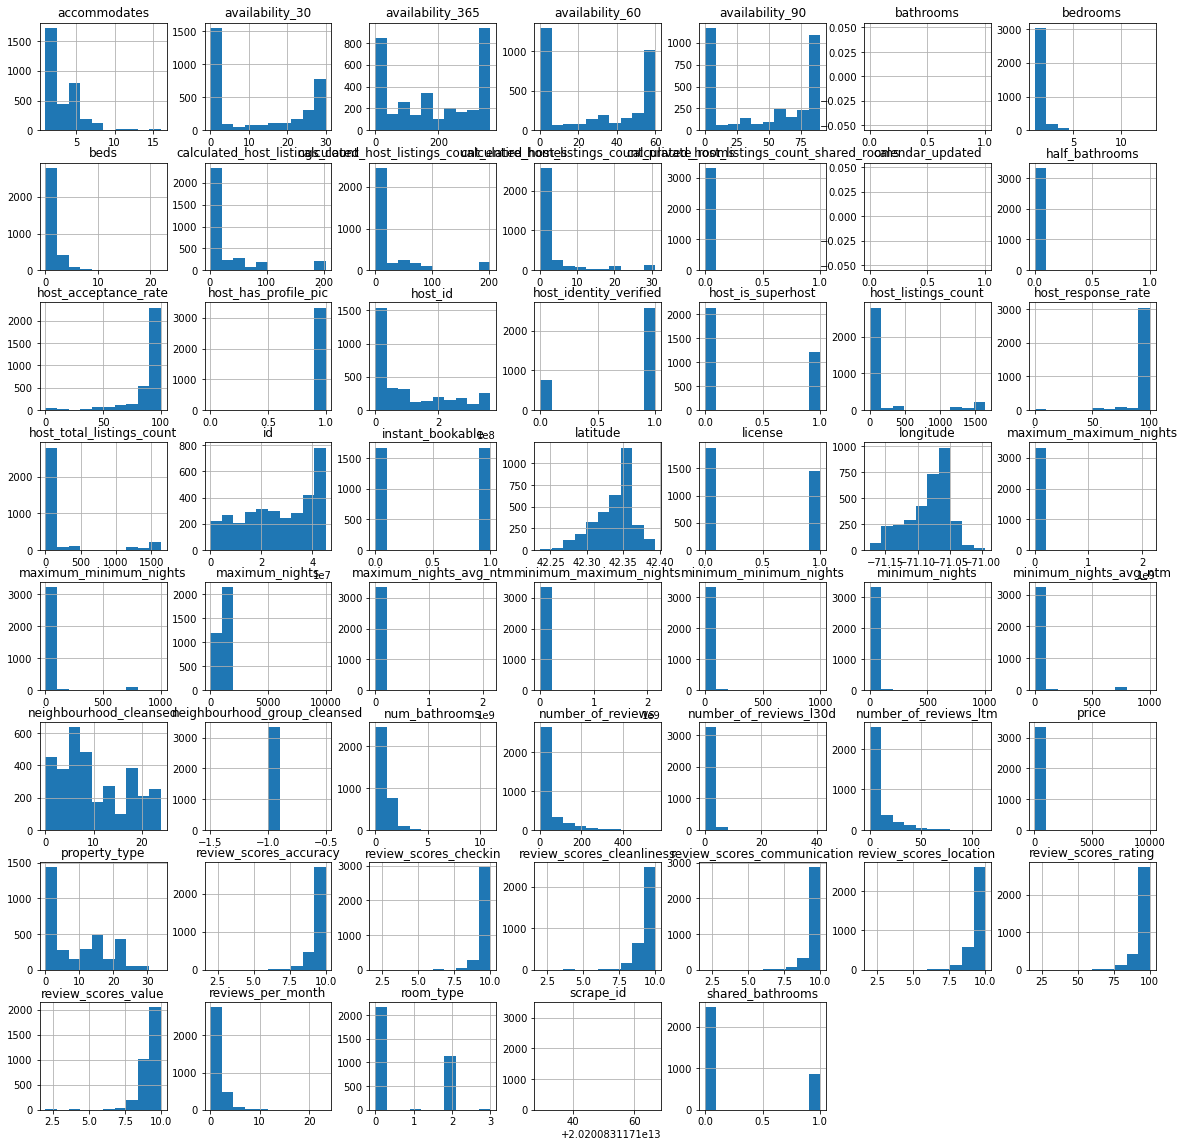

In [10]:
cleaned_df.hist(figsize=(20, 20))

In [11]:
# The following columns are the ones that I chose to build the model since they present the best distributions to work with.
# I have dome some individual checks on some of the solumns but for readability I decided to not include them here.
relevant_features = [
    'id',
    'amenities',
    'host_verifications',
    'price',
    'host_is_superhost', 
    'host_identity_verified', 
    'property_type',
    'room_type',
    'neighbourhood_group_cleansed', 
    'neighbourhood_cleansed',
    'accommodates',
    'bedrooms',
    'beds',
    'num_bathrooms', 
    'shared_bathrooms',
    'review_scores_rating',
    'number_of_reviews',
    'instant_bookable',
    'license',
    'availability_365',
    'review_scores_location',
    'host_response_rate',
    'number_of_reviews_l30d',
    'review_scores_checkin'
]

all_features_df = cleaned_df[relevant_features].copy()
all_features_df = explode_lists(all_features_df)
print("Original: [{}], Cleaned: [{}]".format(listings_df.shape, all_features_df.shape))
all_features_df.describe()

Original: [(3339, 74)], Cleaned: [(3337, 125)]


,id,price,host_is_superhost,host_identity_verified,property_type,room_type,neighbourhood_group_cleansed,neighbourhood_cleansed,accommodates,bedrooms,beds,num_bathrooms,shared_bathrooms,review_scores_rating,number_of_reviews,instant_bookable,license,availability_365,review_scores_location,host_response_rate,number_of_reviews_l30d,review_scores_checkin,amenity_Air conditioning,amenity_BBQ grill,amenity_Baby bath,amenity_Baby monitor,amenity_Babysitter recommendations,amenity_Baking sheet,amenity_Barbecue utensils,amenity_Bathtub,amenity_Beach essentials,amenity_Beachfront,amenity_Bed linens,amenity_Bread maker,amenity_Breakfast,amenity_Building staff,amenity_Cable TV,amenity_Carbon monoxide alarm,amenity_Changing table,amenity_Children’s books and toys,amenity_Children’s dinnerware,amenity_Cleaning before checkout,amenity_Coffee maker,amenity_Cooking basics,amenity_Crib,amenity_Dishes and silverware,amenity_Dishwasher,amenity_Dryer,amenity_EV charger,amenity_Elevator,amenity_Essentials,amenity_Ethernet connection,amenity_Extra pillows and blankets,amenity_Fire extinguisher,amenity_Fireplace guards,amenity_First aid kit,amenity_Free parking on premises,amenity_Free street parking,amenity_Game console,amenity_Garden or backyard,amenity_Gym,amenity_Hair dryer,amenity_Hangers,amenity_Heating,amenity_High chair,amenity_Host greets you,amenity_Hot tub,amenity_Hot water,amenity_Indoor fireplace,amenity_Iron,amenity_Keypad,amenity_Kitchen,amenity_Lake access,amenity_Laptop-friendly workspace,amenity_Lock on bedroom door,amenity_Lockbox,amenity_Long term stays allowed,amenity_Luggage dropoff allowed,amenity_Microwave,amenity_Outlet covers,amenity_Oven,amenity_Pack ’n Play/travel crib,amenity_Paid parking off premises,amenity_Paid parking on premises,amenity_Patio or balcony,amenity_Piano,amenity_Pocket wifi,amenity_Pool,amenity_Private entrance,amenity_Private living room,amenity_Refrigerator,amenity_Room-darkening shades,amenity_Shampoo,amenity_Shower gel,amenity_Single level home,amenity_Ski-in/Ski-out,amenity_Smart lock,amenity_Smoke alarm,amenity_Stair gates,amenity_Stove,amenity_TV,amenity_Table corner guards,amenity_Washer,amenity_Waterfront,amenity_Wifi,amenity_Window guards,amenity_nan,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_government_id,host_verifications_identity_manual,host_verifications_jumio,host_verifications_kba,host_verifications_manual_offline,host_verifications_manual_online,host_verifications_offline_government_id,host_verifications_phone,host_verifications_reviews,host_verifications_selfie,host_verifications_sent_id,host_verifications_sesame,host_verifications_sesame_offline,host_verifications_weibo,host_verifications_work_email
count,3.337000e+03,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.0,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.

### Clean up data
Remove columns that won't contribute positively to the model.
- Price == 0 or null
- Amenities with all 0s or 1s
- Amenities with less than 10 entries

In [12]:
all_features_df = all_features_df.drop(columns=['amenity_nan'])
all_cleaned_df = all_features_df.loc[:, (all_features_df != 1).any(axis=0)]
all_cleaned_df = all_cleaned_df.loc[:, (all_features_df != 0).any(axis=0)]
all_cleaned_df = all_cleaned_df[all_cleaned_df.price > .0]
print("Original: [{}], Cleaned: [{}]".format(all_features_df.shape, all_cleaned_df.shape))

all_cleaned_df.head(5)

Original: [(3337, 124)], Cleaned: [(3337, 123)]


,id,price,host_is_superhost,host_identity_verified,property_type,room_type,neighbourhood_group_cleansed,neighbourhood_cleansed,accommodates,bedrooms,beds,num_bathrooms,shared_bathrooms,review_scores_rating,number_of_reviews,instant_bookable,license,availability_365,review_scores_location,host_response_rate,number_of_reviews_l30d,review_scores_checkin,amenity_Air conditioning,amenity_BBQ grill,amenity_Baby bath,amenity_Baby monitor,amenity_Babysitter recommendations,amenity_Baking sheet,amenity_Barbecue utensils,amenity_Bathtub,amenity_Beach essentials,amenity_Beachfront,amenity_Bed linens,amenity_Bread maker,amenity_Breakfast,amenity_Building staff,amenity_Cable TV,amenity_Carbon monoxide alarm,amenity_Changing table,amenity_Children’s books and toys,amenity_Children’s dinnerware,amenity_Cleaning before checkout,amenity_Coffee maker,amenity_Cooking basics,amenity_Crib,amenity_Dishes and silverware,amenity_Dishwasher,amenity_Dryer,amenity_EV charger,amenity_Elevator,amenity_Essentials,amenity_Ethernet connection,amenity_Extra pillows and blankets,amenity_Fire extinguisher,amenity_Fireplace guards,amenity_First aid kit,amenity_Free parking on premises,amenity_Free street parking,amenity_Game console,amenity_Garden or backyard,amenity_Gym,amenity_Hair dryer,amenity_Hangers,amenity_Heating,amenity_High chair,amenity_Host greets you,amenity_Hot tub,amenity_Hot water,amenity_Indoor fireplace,amenity_Iron,amenity_Keypad,amenity_Kitchen,amenity_Lake access,amenity_Laptop-friendly workspace,amenity_Lock on bedroom door,amenity_Lockbox,amenity_Long term stays allowed,amenity_Luggage dropoff allowed,amenity_Microwave,amenity_Outlet covers,amenity_Oven,amenity_Pack ’n Play/travel crib,amenity_Paid parking off premises,amenity_Paid parking on premises,amenity_Patio or balcony,amenity_Piano,amenity_Pocket wifi,amenity_Pool,amenity_Private entrance,amenity_Private living room,amenity_Refrigerator,amenity_Room-darkening shades,amenity_Shampoo,amenity_Shower gel,amenity_Single level home,amenity_Ski-in/Ski-out,amenity_Smart lock,amenity_Smoke alarm,amenity_Stair gates,amenity_Stove,amenity_TV,amenity_Table corner guards,amenity_Washer,amenity_Waterfront,amenity_Wifi,amenity_Window guards,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_government_id,host_verifications_identity_manual,host_verifications_jumio,host_verifications_kba,host_verifications_manual_offline,host_verifications_manual_online,host_verifications_offline_government_id,host_verifications_reviews,host_verifications_selfie,host_verifications_sent_id,host_verifications_sesame,host_verifications_sesame_offline,host_verifications_weibo,host_verifications_work_email
0,3781,146.0,1,0,2,0,-1,9,2,1.00000,0.0,1.0,0,99.0,16,0,1,0,10.0,69.0,0,10.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5506,145.0,1,1,6,0,-1,19,2,1.00000,1.0,1.0,0,95.0,107,0,0,0,9.0,100.0,0,10.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,6695,169.0,1,1,4,0,-1,19,4,1.00000,1.0,1.0,0,96.0,115,0,0,0,9.0,100.0,0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,10730,85.0,1,1,2,0,-1,8,2,1.00000,1.0,1.0,0,96.0,32,0,1,364,10.0,100.0,0,10.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0
4,10813,87.0,0,1,2,0,-1,1,3,1.44471,1.0,1.0,0,98.0,10,0,1,0,10.0,97.0,0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,

## Modeling

For modeling we are going to use a Linear Regression which is suitable for this type of problems.

Since our **target variable (price)** is a continuous variable and we need to check if the distribution is somehow skewed.

As we can see by the charts bellow, our variable is quite skewed in that way we can use some strategies let's explore 3 of them SquareRoot, Log, BoxCox. So, BoxCox give us the best aproximation of the normal distribution for our target variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1287ad850>,
      dtype=object)

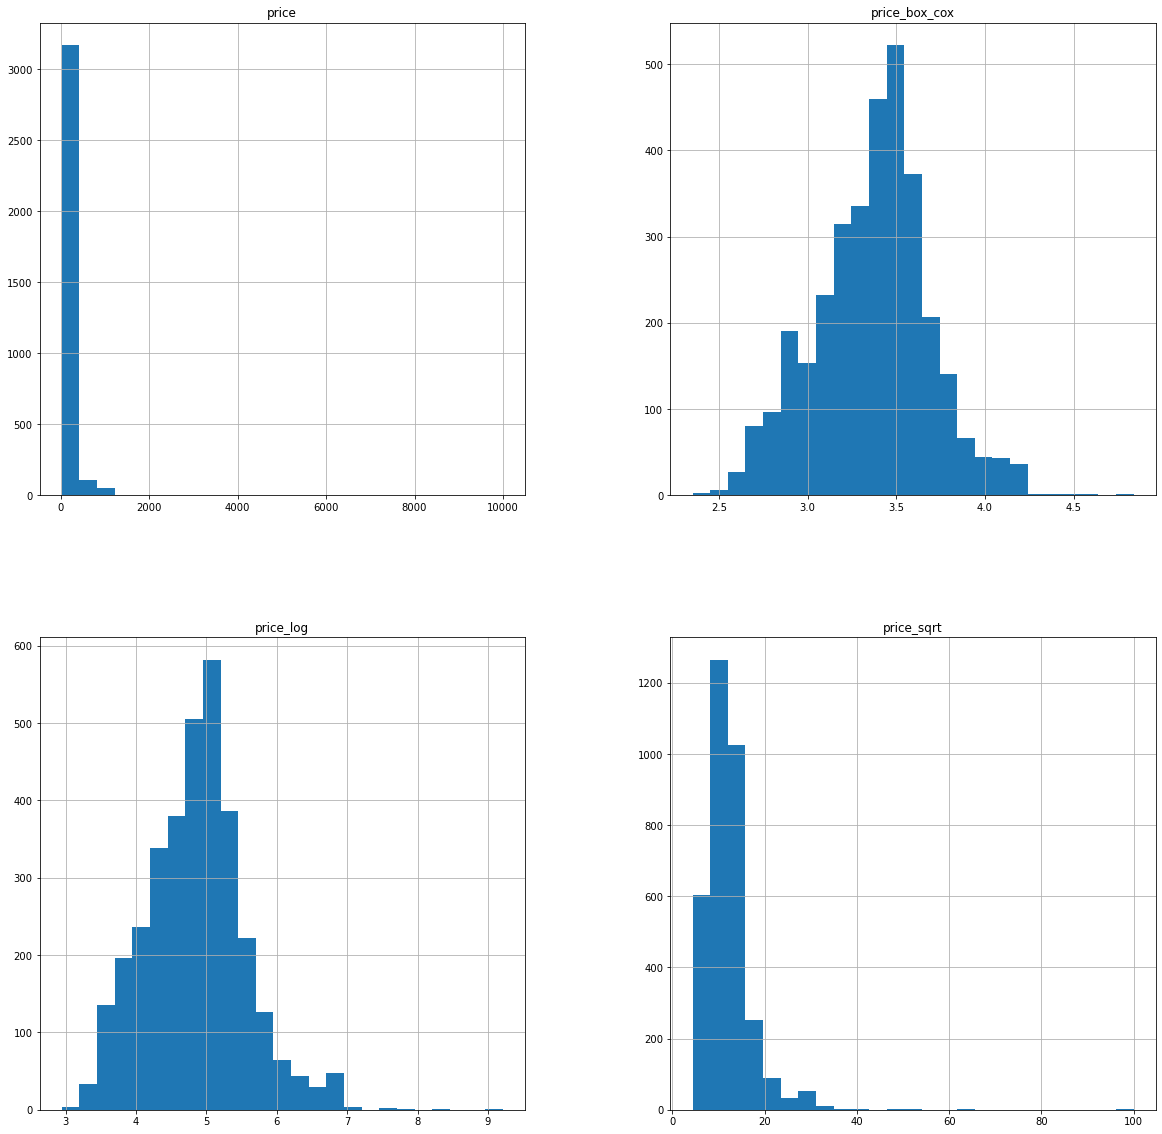

In [13]:
price_distribution = all_features_df[["price"]].copy()
price_distribution["price_log"] = np.log(all_features_df["price"])
price_distribution["price_sqrt"] = np.sqrt(all_features_df["price"])
price_distribution["price_box_cox"],_ = stats.boxcox(all_features_df["price"])
price_distribution.hist(figsize=(20, 20), bins=25)

In [14]:
def train_model(df, cols_to_drop, test_size):
    X = df.drop(columns=(['id', 'price'] + cols_to_drop))
    y, _ = stats.boxcox(df["price"])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    
    return X, y, X_train, X_test, y_train, y_test, y_test_preds, y_train_preds, test_score, train_score, lm_model

## Evaluation

For evaluation we are using 30% of the dataset for testing and the rest for training.

In [15]:
X, y, X_train, X_test, y_train, y_test, y_test_preds, y_train_preds, test_score, train_score, lm_model = train_model(all_features_df, ['id', 'price'], .3)
print("The rsquared on the training data is {}. The rsquared on the test data is {}.".format(train_score, test_score))

The rsquared on the training data is 0.7037187023967562. The rsquared on the test data is 0.625740873202147.


In [16]:
coefs = c.get_model_coefs(lm_model, X)
coefs_sorted = sorted(coefs.items(), key=operator.itemgetter(1), reverse=True)
coefs_sorted

[('host_verifications_sesame_offline', 535550699525.89056),
 ('amenity_Changing table', 0.16636405783996333),
 ('amenity_Pocket wifi', 0.09765094034235507),
 ('amenity_Gym', 0.09123305887587367),
 ('amenity_Paid parking on premises', 0.07891545731724965),
 ('amenity_Pool', 0.0650071042893069),
 ('amenity_Indoor fireplace', 0.06162677825843922),
 ('amenity_Building staff', 0.06112835067477336),
 ('amenity_Shampoo', 0.06088437549252059),
 ('amenity_EV charger', 0.06087362791235811),
 ('host_verifications_manual_offline', 0.05376625081308666),
 ('amenity_High chair', 0.051901815657696034),
 ('amenity_Essentials', 0.04825479992167623),
 ('amenity_Children’s dinnerware', 0.045745669988902844),
 ('amenity_Elevator', 0.04504676210165339),
 ('amenity_Wifi', 0.043931177833763047),
 ('amenity_Single level home', 0.04000579886669622),
 ('amenity_Hair dryer', 0.039896261890772465),
 ('amenity_Hot tub', 0.039232122582642824),
 ('num_bathrooms', 0.03731897301277751),
 ('amenity_Patio or balcony', 0.

In [17]:
amenities_coefs = dict([(key, value) for (key, value) in coefs_sorted if key.startswith("amenity_")])
amenities_coefs_df = pd.DataFrame.from_dict(amenities_coefs, orient='index', columns=['coef'])
amenities_coefs_df

,coef
amenity_Changing table,0.166364
amenity_Pocket wifi,0.097651
amenity_Gym,0.091233
amenity_Paid parking on premises,0.078915
amenity_Pool,0.065007
amenity_Indoor fireplace,0.061627
amenity_Building staff,0.061128
amenity_Shampoo,0.060884
amenity_EV charger,0.060874
amenity_High chair,0.051902


Text(0, 0.5, 'Linear Regression Coefficient')

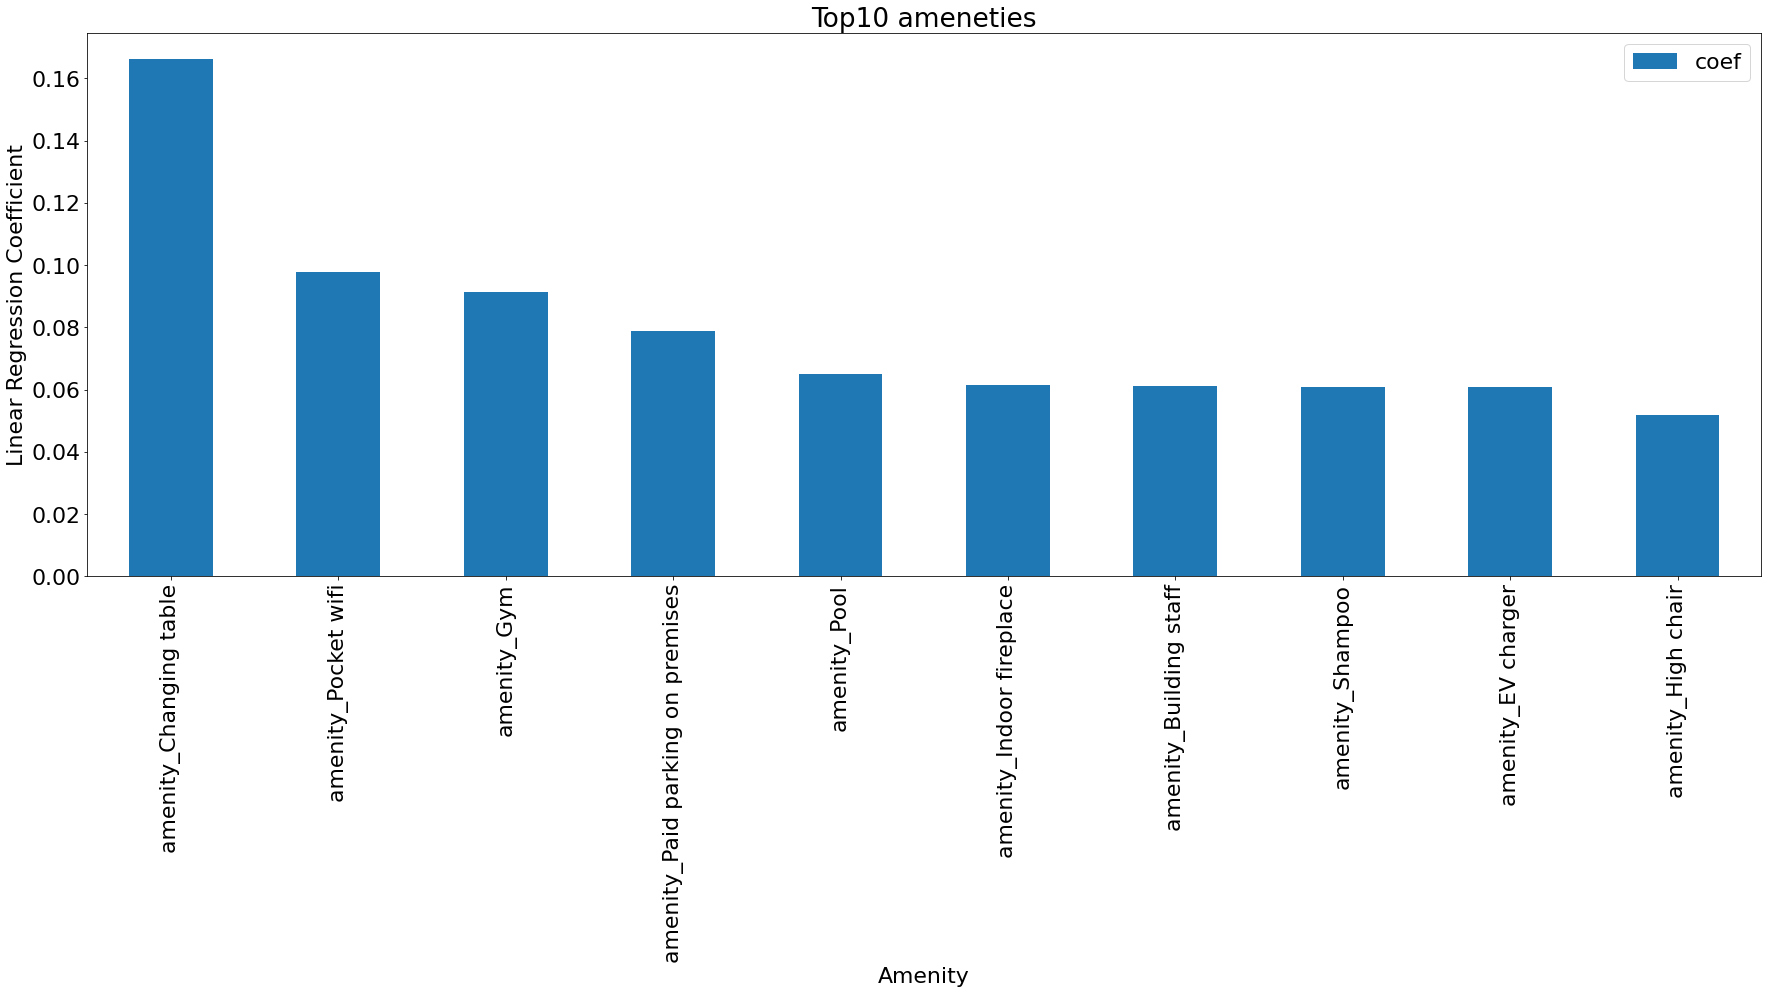

In [18]:
plt.rcParams.update({'font.size': 22})
ax = amenities_coefs_df.head(10).plot(kind='bar', figsize=(30,10), title='Top10 ameneties')
ax.set_xlabel("Amenity")
ax.set_ylabel("Linear Regression Coefficient")

## Conclusions

We got a model with a R-Score of 63% which is not fantastic but it tells us that with a bit more feature engeneering work it is possible to have a better model. For example, working more on the data unit location characteristics and exploring the other datasets provided for Boston.

Even with this small model we can understand from the coefficients that amenities have an important role in the pricing and they can gives some clues how owners can increse their prices just by adding some features as example: PocketWifi, BabyCare features, BBQ.